In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import shap
from sklearn.metrics import mean_absolute_percentage_error


In [25]:
anuies_enrollment = pd.read_csv('../data/raw/anuies_enrollment.csv')
banxico_mun_income_remittances = pd.read_csv('../data/raw/banxico_mun_income_remittances.csv')
finance_inc = pd.read_csv('../data/raw/general_financial_inclusion.csv', index_col=0)

In [162]:
finance_inc

,informacion_general_clave_municipio,informacion_general_clave_estado,informacion_general_region,informacion_general_estado,informacion_general_municipio,informacion_general_poblacion,informacion_general_poblacion_adulta,informacion_general_poblacion_adulta_mujeres,informacion_general_poblacion_adulta_hombres,informacion_general_tipo_de_poblacion,...,saldo_promedio_de_contratos_de_captacion_banca_transaccionales_tradicionales_hombres,saldo_promedio_de_contratos_de_captacion_banca_transaccionales_tradicionales_personas_morales,saldo_promedio_de_contratos_de_captacion_banca_transaccionales_tradicionales_total,saldo_promedio_de_contratos_de_captacion_banca_total_mujeres,saldo_promedio_de_contratos_de_captacion_banca_total_hombres,saldo_promedio_de_contratos_de_captacion_banca_total_personas_morales,saldo_promedio_de_contratos_de_captacion_banca_total_total,numero_de_contratos_de_credito_banca_multiple_hipotecarios_mujeres,numero_de_contratos_de_credito_banca_multiple_hipotecarios_hombres,numero_de_contratos_de_credito_banca_multiple_hipotecarios_total
0,1001.0,1.0,Occidente y Bajío,Aguascalientes,Aguascalientes,948990.000000,707473.000000,368028.000000,339445.000000,Semi-metrópoli,...,26397.800857559738,989705.0648198584,56929.40575650634,34012.16678778122,39459.04969899977,1158940.7798500503,64569.93186703783,7953.0,13730.0,21683.0
1,1002.0,1.0,Occidente y Bajío,Aguascalientes,Asientos,51536.000000,35250.000000,18088.000000,17162.000000,Urbano,...,-,-,-,294.9933628318584,816.4019138755981,-,545.5091954022988,50.0,120.0,170.0
2,1003.0,1.0,Occidente y Bajío,Aguascalientes,Calvillo,58250.000000,41495.000000,21446.000000,20049.000000,Urbano,...,38322.00511302476,211369.0906344411,38703.486172080775,50673.81459972065,55716.72813871347,208532.38095238095,54975.696718494975,43.0,40.0,83.0
3,1004.0,1.0,Occidente y Bajío,Aguascalientes,Cosío,17000.000000,11817.000000,6125.000000,5692.000000,Semi-urbano,...,-,-,-,283.0,512.311320754717,-,400.99514563106794,46.0,110.0,156.0
4,1005.0,1.0,Occidente y Bajío,Aguascalientes,Jesús María,129929.000000,91487.000000,46899.000000,44588.000000,Urbano,...,15596.388089330025,190361.01923076922,15683.935168297132,13049.97952507875,14247.925024108004,190361.01923076922,14203.95675219853,1711.0,2680.0,4391.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7393,32054.0,32.0,Occidente y Bajío,Zacatecas,Villa Hidalgo,19991.945263,14107.154222,7369.092390,6738.061833,Semi-urbano,...,-,-,-,289.1818181818182,439.75,-,307.25,4.0,3.0,7.0
7394,32055.0,32.0,Occidente y Bajío,Zacatecas,Villanueva,30250.851215,22462.958336,11734.064841,10728.893495,Semi-urbano,...,24497.41114852226,201708.3673469388,23580.699862637364,34563.183647798745,35491.72394933794,201472.48,35958.314323607425,4.0,23.0,27.0
7395,32056.0,32.0,Occidente y Bajío,Zacatecas,Zacatecas,148910.958026,109936.469198,59132.886350,50803.582848,Urbano,...,22844.222995106982,375175.34844668343,32578.658963672555,25797.747326469103,30111.135860383485,533918.095659164,40037.77082818294,1034.0,1506.0,2540.0
7396,32057.0,32.0,Occidente y Bajío,Zacatecas,Trancoso,18584.488531,13075.317716,6827.699651,6247.618065,Semi-urbano,...,-,-,-,126.6395881006865,306.25555555555553,-,143.40871369294607,16.0,32.0,48.0


In [26]:
banxico_mun_income_remittances['clave_unica'] = (
    banxico_mun_income_remittances['Municipality ID'].astype('str') + 
    '_' +
    banxico_mun_income_remittances['Year'].astype('str') + '03'
)
desired_remitances = banxico_mun_income_remittances[banxico_mun_income_remittances['Year'].isin([2019, 2020, 2021])]

In [27]:
target = desired_remitances[['Remittance Amount', 'clave_unica']].rename(columns={'Remittance Amount': 'remesa'})

In [85]:
data = finance_inc.merge(target, on='clave_unica', how='inner')
for i in range(3):
    data[f'random_feature{i}'] = np.random.randint(0,100,data.shape[0])

In [109]:
non_usable_data =[
    'informacion_general_clave_municipio',
    'informacion_general_clave_estado', 
    'date'
]

In [163]:
data.select_dtypes('number')

,informacion_general_clave_municipio,informacion_general_clave_estado,informacion_general_poblacion,informacion_general_poblacion_adulta,informacion_general_poblacion_adulta_mujeres,informacion_general_poblacion_adulta_hombres,tenencia_numero_de_contratos_-_banca_captacion_cuentas_transaccionales_nivel_1,tenencia_numero_de_contratos_-_banca_captacion_cuentas_transaccionales_nivel_2,tenencia_numero_de_contratos_-_banca_captacion_cuentas_transaccionales_nivel_3,tenencia_numero_de_contratos_-_banca_captacion_cuentas_transaccionales_tradicionales,...,saldo_de_contratos_de_captacion_banca_total_hombres,saldo_de_contratos_de_captacion_banca_total_personas_morales,saldo_de_contratos_de_captacion_banca_total_total,numero_de_contratos_de_credito_banca_multiple_hipotecarios_mujeres,numero_de_contratos_de_credito_banca_multiple_hipotecarios_hombres,numero_de_contratos_de_credito_banca_multiple_hipotecarios_total,remesa,random_feature0,random_feature1,random_feature2
0,1001.0,1.0,948990.000000,707473.000000,368028.000000,339445.000000,0.0,265380.0,5882.0,774706.0,...,2.033254e+10,3.107004e+10,6.965630e+10,7953.0,13730.0,21683.0,282424268.0,77,81,74
1,1002.0,1.0,51536.000000,35250.000000,18088.000000,17162.000000,0.0,870.0,0.0,0.0,...,3.412560e+05,0.000000e+00,4.745930e+05,50.0,120.0,170.0,8554649.0,45,91,62
2,1003.0,1.0,58250.000000,41495.000000,21446.000000,20049.000000,0.0,2966.0,19.0,18224.0,...,5.205614e+08,7.006688e+07,1.279944e+09,43.0,40.0,83.0,84779716.0,34,6,42
3,1004.0,1.0,17000.000000,11817.000000,6125.000000,5692.000000,0.0,206.0,0.0,0.0,...,5.430500e+04,0.000000e+00,8.260500e+04,46.0,110.0,156.0,2509718.0,22,92,18
4,1005.0,1.0,129929.000000,91487.000000,46899.000000,44588.000000,0.0,4272.0,0.0,12062.0,...,1.182008e+08,9.898773e+06,2.358141e+08,1711.0,2680.0,4391.0,15924154.0,5,30,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7117,32054.0,32.0,19991.945263,14107.154222,7369.092390,6738.061833,0.0,300.0,0.0,0.0,...,1.583100e+04,0.000000e+00,9.217500e+04,4.0,3.0,7.0,8392576.0,74,71,65
7118,32055.0,32.0,30250.851215,22462.958336,11734.064841,10728.893495,0.0,1356.0,92.0,5824.0,...,1.232982e+08,1.007362e+07,2.982383e+08,4.0,23.0,27.0,40190891.0,8,69,11
7119,32056.0,32.0,148910.958026,109936.469198,59132.886350,50803.582848,0.0,51413.0,5852.0,192912.0,...,3.671571e+09,3.320971e+09,1.036498e+10,1034.0,1506.0,2540.0,106513251.0,59,17,3
7120,32057.0,32.0,18584.488531,13075.317716,6827.699651,6247.618065,0.0,964.0,0.0,0.0,...,2.756300e+04,0.000000e+00,1.382460e+05,16.0,32.0,48.0,399493.0,22,56,23


In [86]:
train_window = data[data.date < 202100].select_dtypes('number')
oot_window = data[data.date > 202100].select_dtypes('number')

In [151]:
X_train, X_test, y_train, y_test = train_test_split(
    np.log(train_window.drop(['remesa'] + non_usable_data, axis=1)+1),
    np.log(train_window.remesa+1), test_size=0.1, random_state=42)
X_oot = np.log(oot_window.drop(['remesa'] + non_usable_data, axis=1)+1)
y_oot = np.log(oot_window.remesa+1)

In [152]:
from xgboost import XGBRegressor

In [153]:
model = XGBRegressor(learning_rate=0.1, max_depth=8, n_estimators=1000)
model.fit(X_train, y_train)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='remesa'>

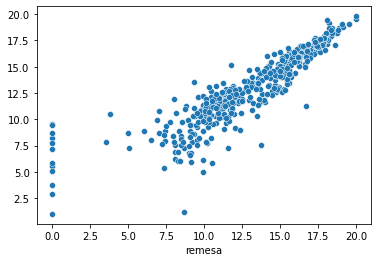

In [154]:
sns.scatterplot(y_test, model.predict(X_test))
#sns.scatterplot(np.exp(y_test), np.exp(model.predict(X_test)))

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='remesa'>

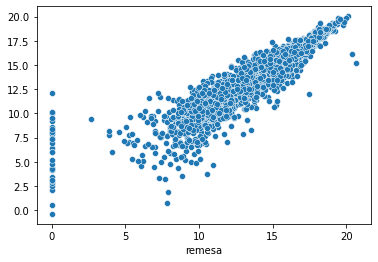

In [155]:
sns.scatterplot(y_oot, model.predict(X_oot))
#sns.scatterplot(np.exp(y_oot), np.exp(model.predict(X_oot)))

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


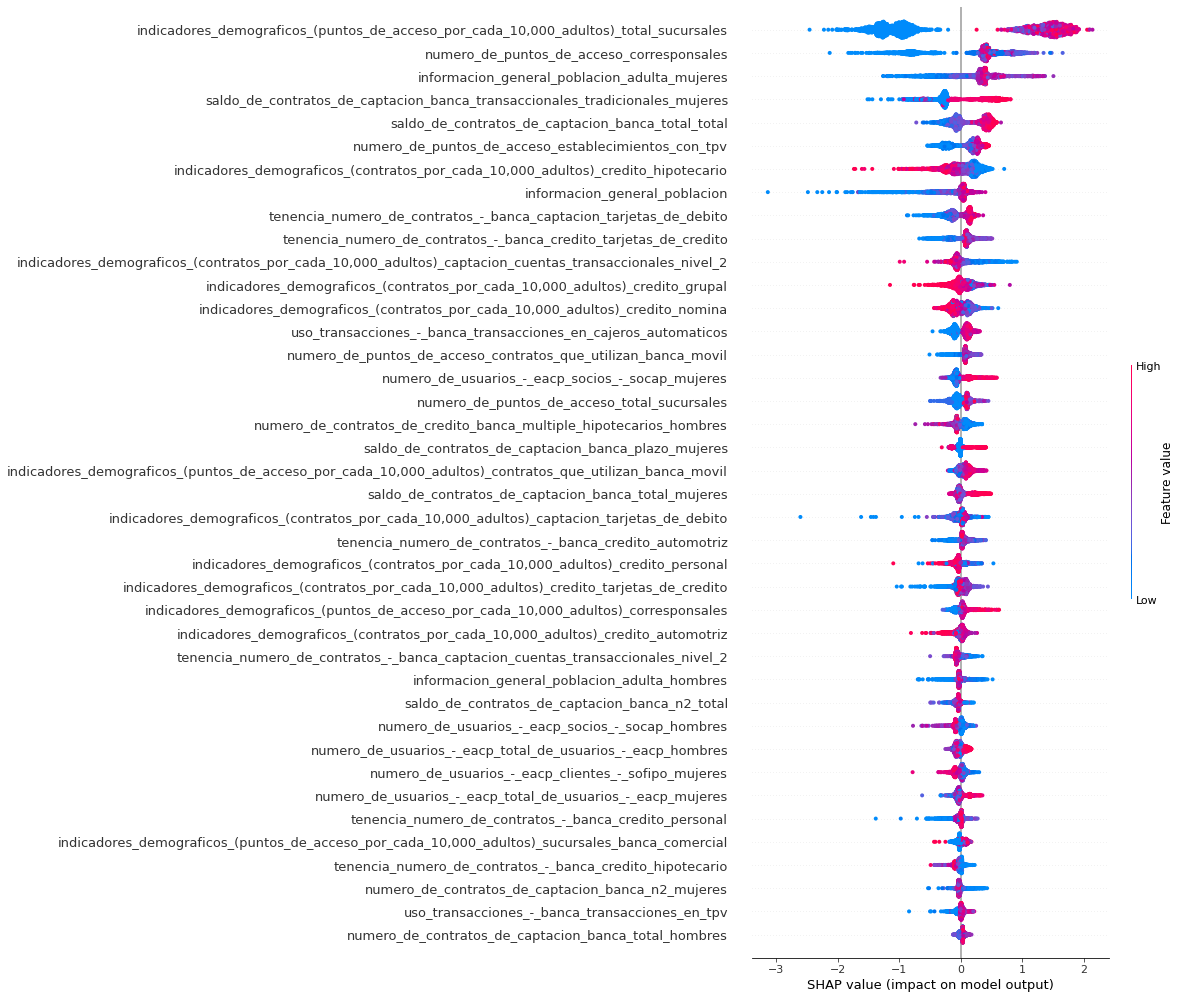

In [156]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_oot, check_additivity=False)
shap.summary_plot(shap_values, X_oot, max_display=40)

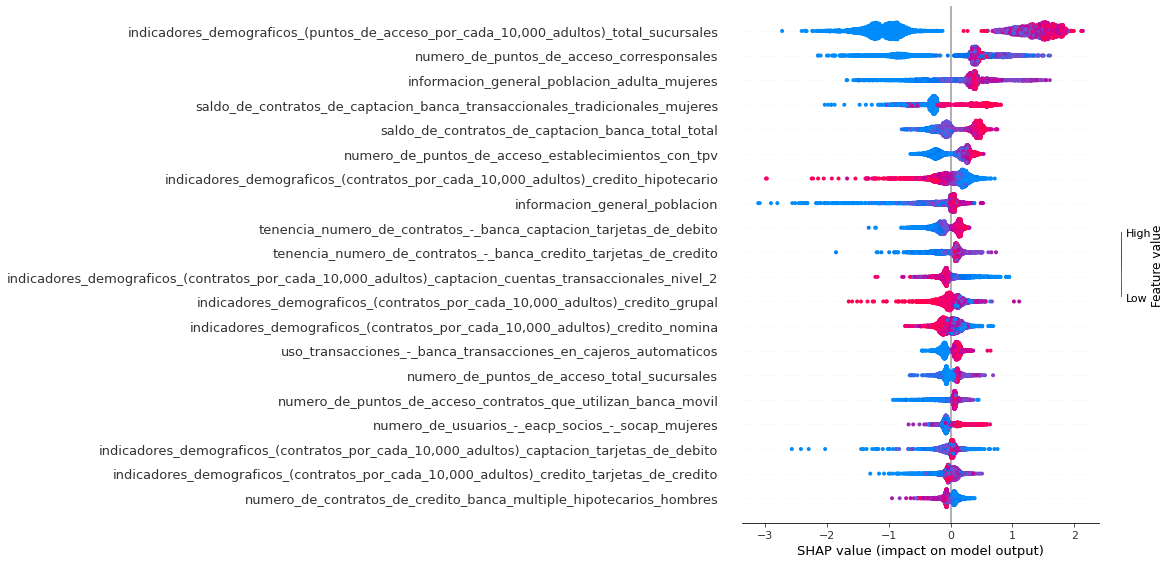

In [157]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

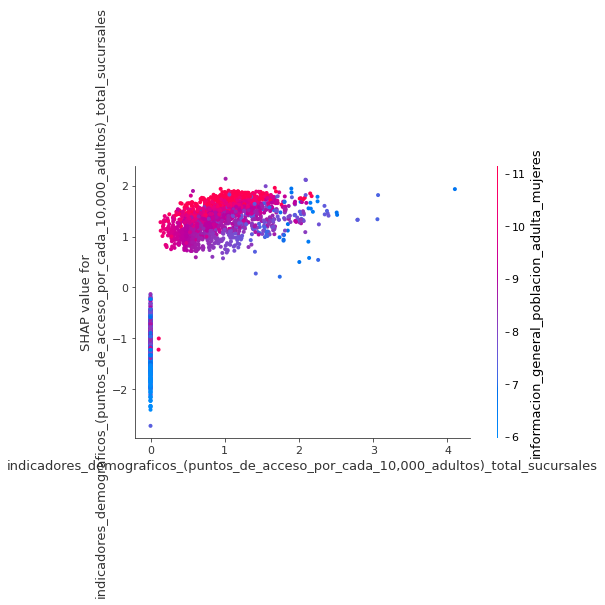

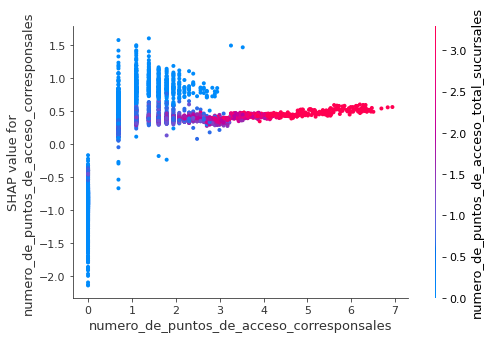

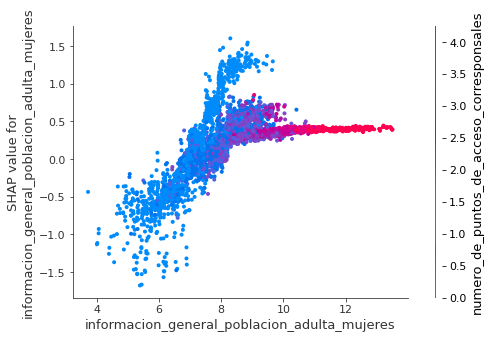

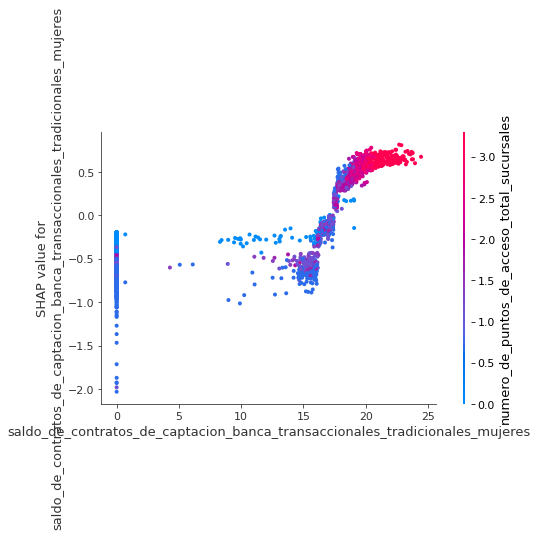

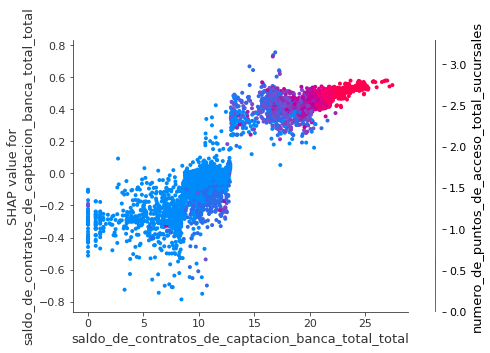

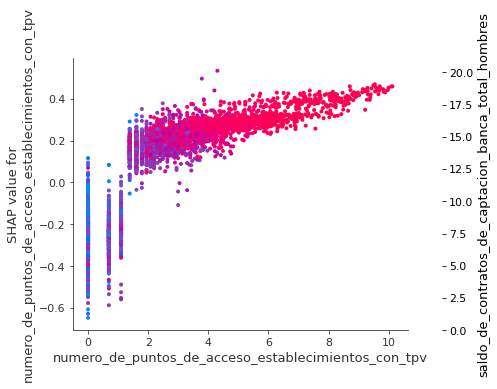

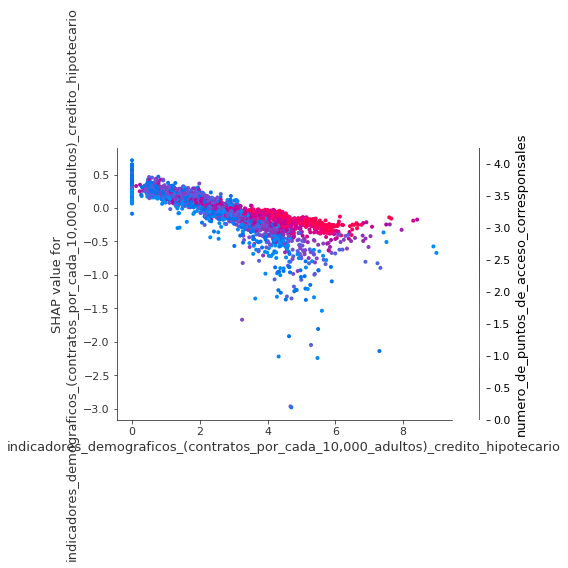

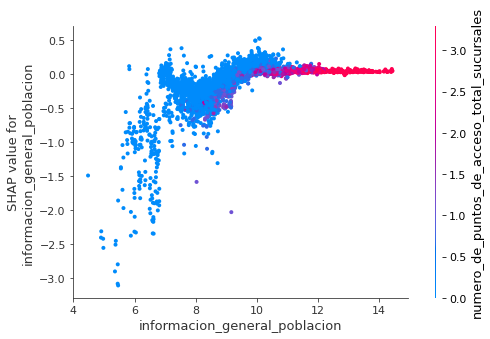

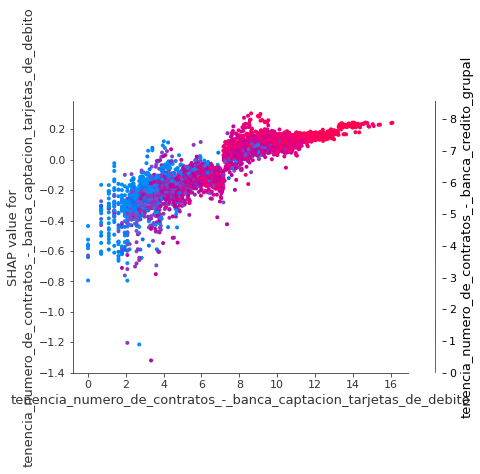

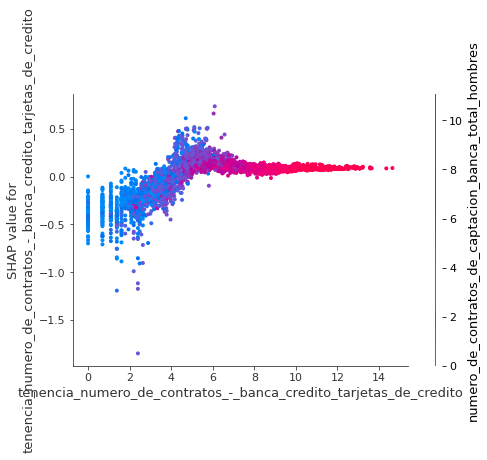

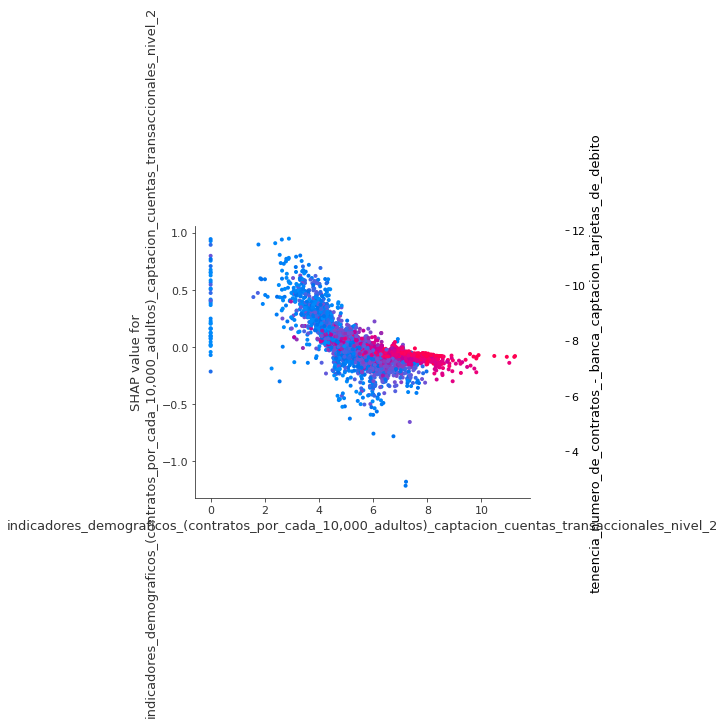

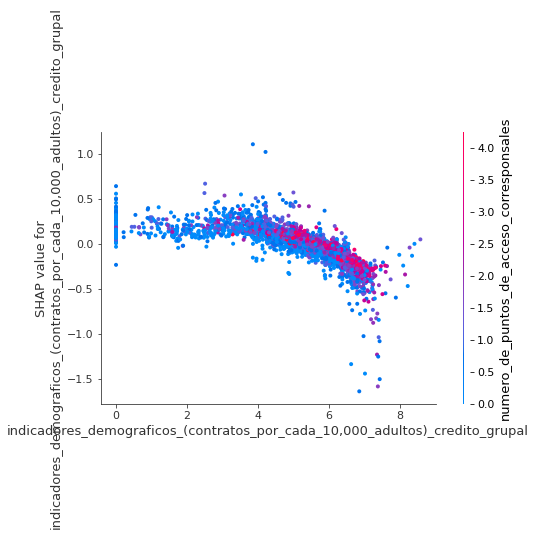

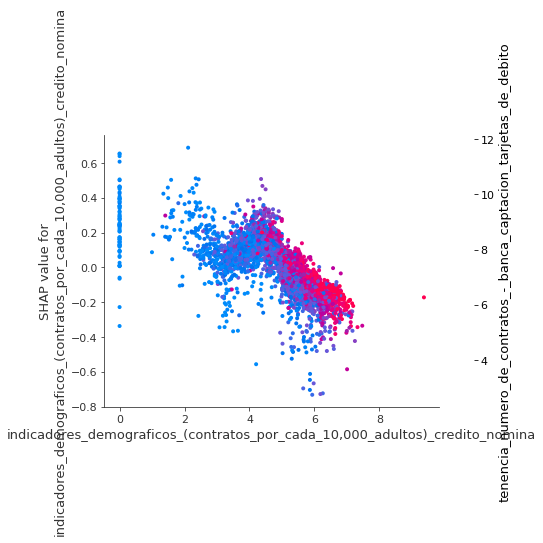

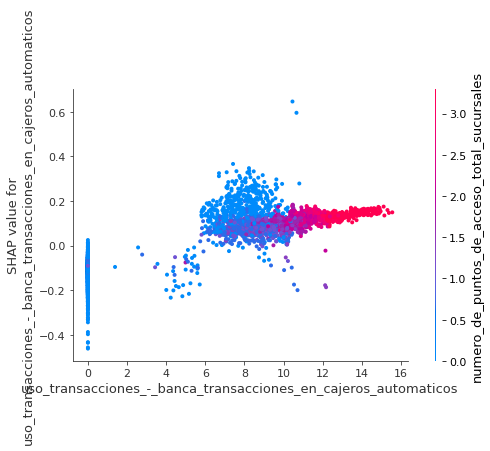

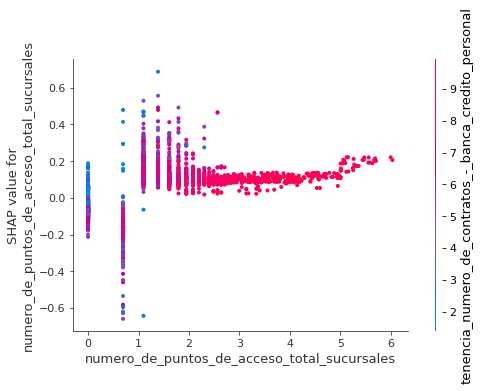

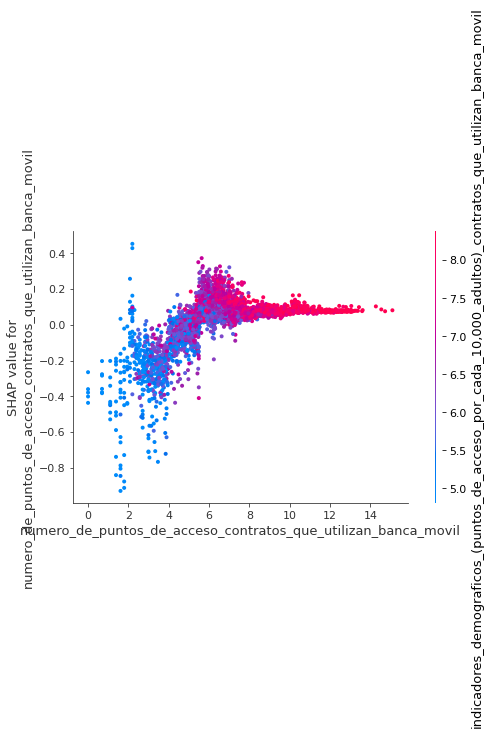

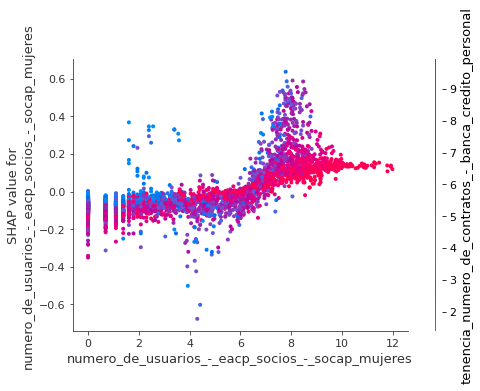

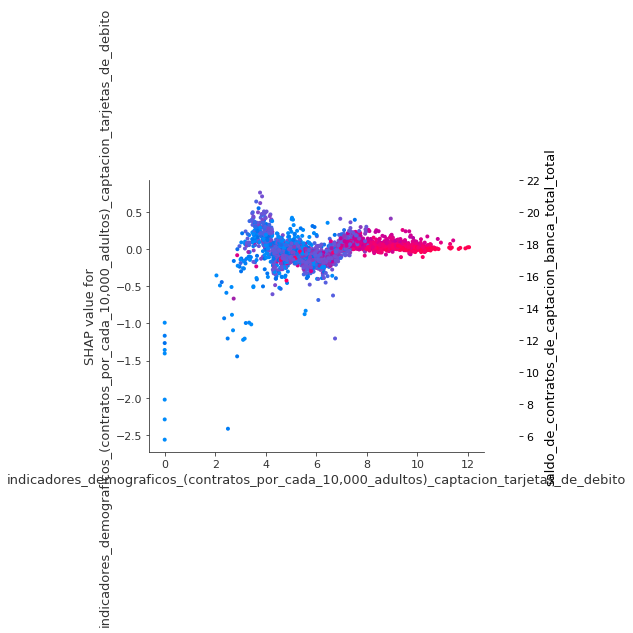

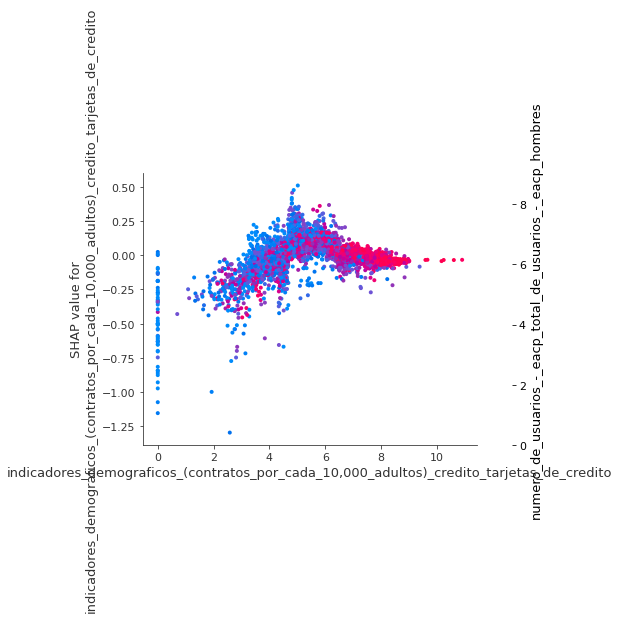

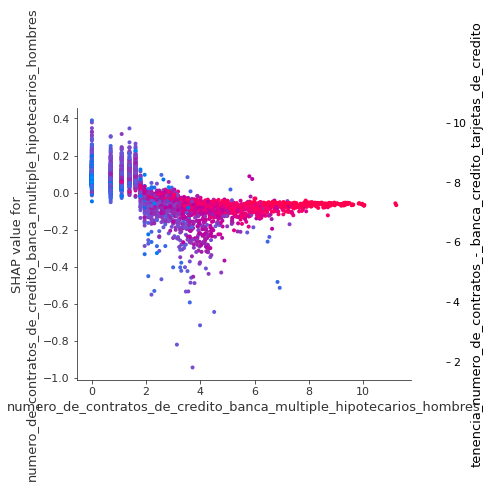

In [158]:
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))

# make SHAP plots of the three most important features
for i in range(20):
    shap.dependence_plot(top_inds[i], shap_values, X_train)